In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!git clone https://github.com/denisvivdenko/titanic_practice_dataset.git

fatal: destination path 'titanic_practice_dataset' already exists and is not an empty directory.


In [9]:
!cd titanic_practice_dataset

/bin/bash: line 0: cd: titanic_practice_dataset: No such file or directory


In [10]:
!pwd

/content/titanic_practice_dataset


In [11]:
!git pull origin master

remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
From https://github.com/denisvivdenko/titanic_practice_dataset
 * branch            master     -> FETCH_HEAD
   bc14c48..0b5cde0  master     -> origin/master
Updating bc14c48..0b5cde0
Fast-forward
 EDA.ipynb | 1455 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++-----
 1 file changed, 1344 insertions(+), 111 deletions(-)


In [67]:
df = pd.read_csv("train.csv")

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.shape

(891, 12)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
X, y = df.drop("Survived", axis=1), df.Survived

In [72]:
X.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [73]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Ticket feature

In [74]:
X.Ticket.nunique()

681

Why if the Ticket feature is ticket number even though we don't have missing values they are only 681 unique out of 891

In [75]:
X.Ticket.value_counts().head(20)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
W./C. 6608      4
2666            4
19950           4
347077          4
C.A. 31921      3
Name: Ticket, dtype: int64

In [76]:
X["ticket_code"] = X.Ticket.map(lambda x: " ".join([ticket_info for ticket_info in x.split(" ") if not ticket_info.isnumeric()]))

In [77]:
X.loc[X.ticket_code == "", "ticket_code"] = "nan"

In [78]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,nan
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,nan


In [79]:
X = X.drop("Ticket", axis=1)

In [80]:
X.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,PC


In [81]:
X.set_index("PassengerId", inplace=True)

# Drop name feature

In [82]:
X.drop("Name", axis=1, inplace=True)

In [83]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.25,NaN,S,A/5


# Age feature

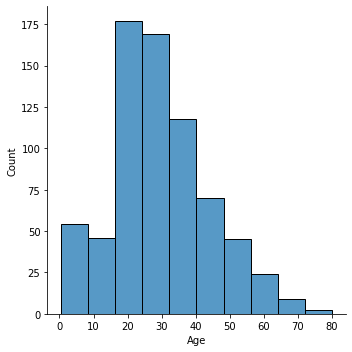

In [84]:
sns.displot(x=X.Age, bins=10);

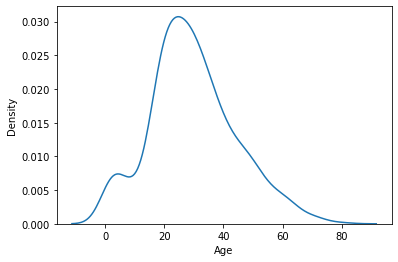

In [85]:
sns.kdeplot(x=X.Age);

Distribution has two peacks and long right tail therefore we cannot assume that it is normally distributed

In [86]:
X.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

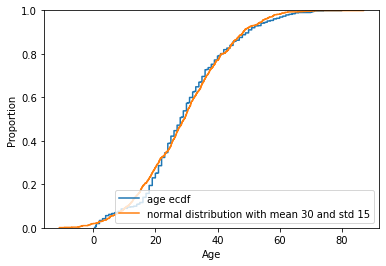

In [87]:
sns.ecdfplot(X.Age);
sns.ecdfplot(np.random.normal(30, 15, size=10**3));
plt.legend(labels=["age ecdf","normal distribution with mean 30 and std 15"]);

We can see that it is nearly normally distributed. We have to get rid of outliers. And if we need it normally distributed we should apply log transform.

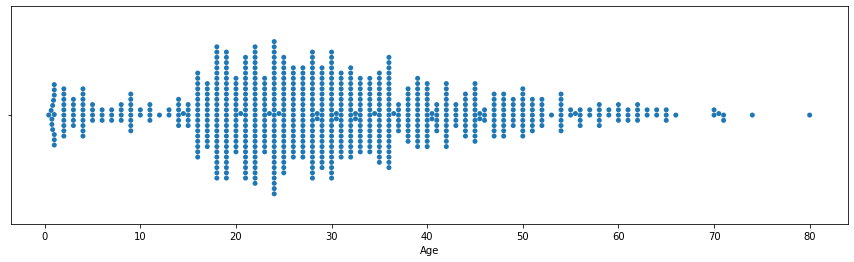

In [88]:
plt.figure(figsize=(15, 4));
sns.swarmplot(x=X.Age);

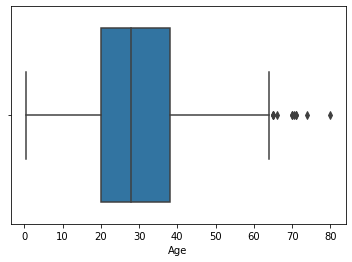

In [89]:
sns.boxplot(x=X.Age);

Outliers on the right side. We can detect the using IQR * 1.5

In [140]:
X["Age"].fillna(X["Age"].median(), inplace=True)

In [147]:
X["Age"] = pd.Series(np.digitize(X["Age"], bins=[5, 12, 18, 25, 45, 60, 150], right=True))

In [148]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,4.0,1,0,7.2500,nan,S,A/5
2,1,female,4.0,1,0,71.2833,C,C,PC


# Fare feature

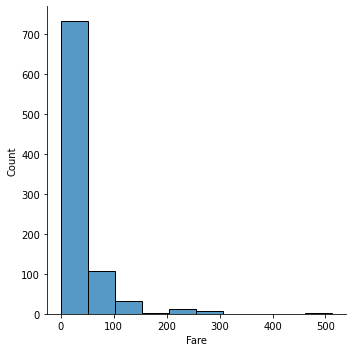

In [91]:
sns.displot(x=X.Fare, bins=10);

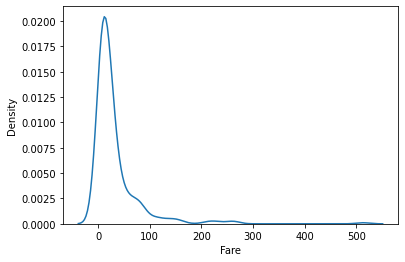

In [92]:
sns.kdeplot(x=X.Fare);

In [93]:
X.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

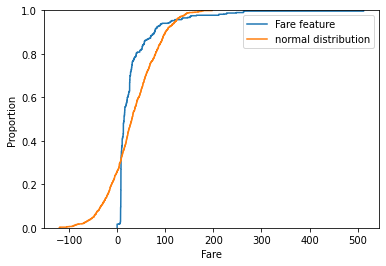

In [94]:
sns.ecdfplot(X.Fare);
sns.ecdfplot(np.random.normal(32, 50, size=10**3));
plt.legend(labels=["Fare feature", "normal distribution"]);

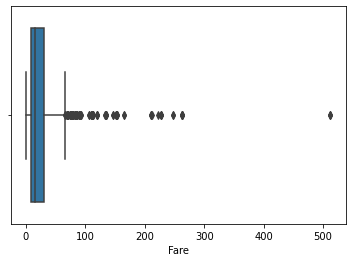

In [95]:
sns.boxplot(x=X.Fare);

In [96]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S,A/5
2,1,female,38.0,1,0,71.2833,C85,C,PC


# Pclass feature

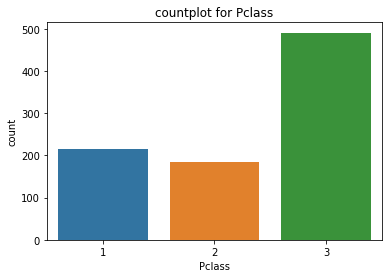

In [97]:
sns.countplot(x=X.Pclass);
plt.title("countplot for Pclass");

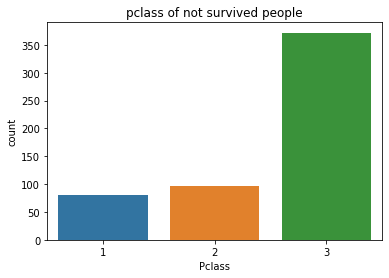

In [98]:
sns.countplot(x=X.reset_index()[y == 0]["Pclass"]);
plt.title("pclass of not survived people");

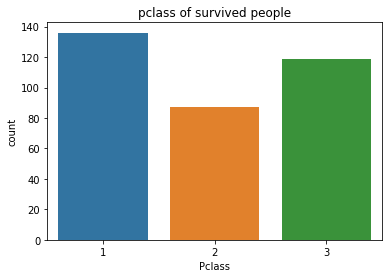

In [99]:
sns.countplot(x=X.reset_index()[y == 1]["Pclass"]);
plt.title("pclass of survived people");

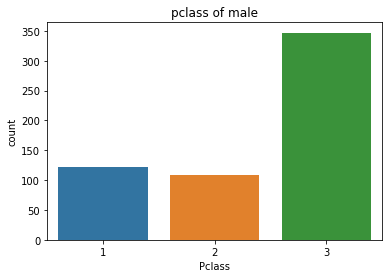

In [100]:
sns.countplot(x=X[X["Sex"] == "male"]["Pclass"]);
plt.title("pclass of male");

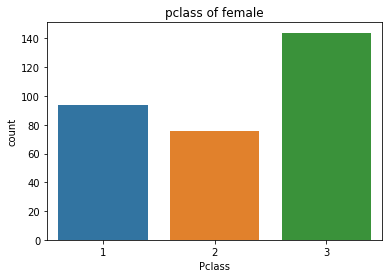

In [101]:
sns.countplot(x=X[X["Sex"] == "female"]["Pclass"]);
plt.title("pclass of female");

# Sex feature

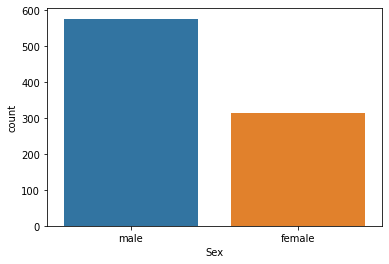

In [102]:
sns.countplot(x=X.Sex);

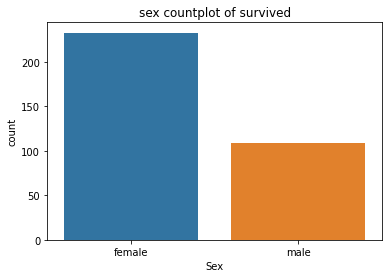

In [103]:
sns.countplot(x=X.reset_index()[y == 1]["Sex"]);
plt.title("sex countplot of survived");

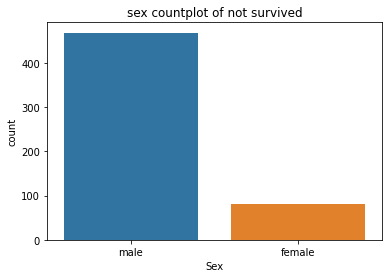

In [104]:
sns.countplot(x=X.reset_index()[y == 0]["Sex"]);
plt.title("sex countplot of not survived");

In [105]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S,A/5
2,1,female,38.0,1,0,71.2833,C85,C,PC
3,3,female,26.0,0,0,7.9250,NaN,S,STON/O2.
4,1,female,35.0,1,0,53.1000,C123,S,nan
5,3,male,35.0,0,0,8.0500,NaN,S,nan


# Cabin feature

In [106]:
X["Cabin"] = X.Cabin.map(lambda x: ''.join(filter(str.isalpha, str(x))))

In [107]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,nan,S,A/5
2,1,female,38.0,1,0,71.2833,C,C,PC
3,3,female,26.0,0,0,7.9250,nan,S,STON/O2.
4,1,female,35.0,1,0,53.1000,C,S,nan
5,3,male,35.0,0,0,8.0500,nan,S,nan


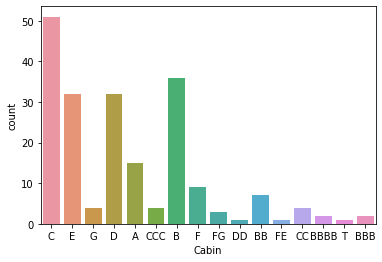

In [111]:
sns.countplot(x=X.Cabin[X.Cabin != "nan"]);

In [112]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.25,nan,S,A/5


# Parch feature

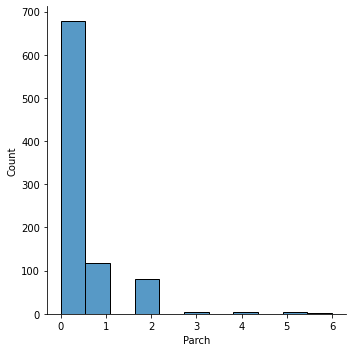

In [114]:
sns.displot(x=X.Parch);

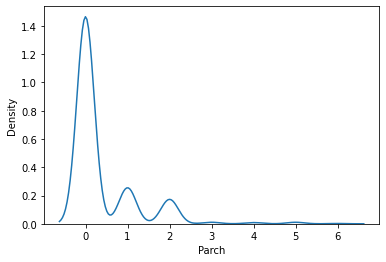

In [116]:
sns.kdeplot(x=X.Parch);

In [122]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.25,nan,S,A/5


# SibSp feature

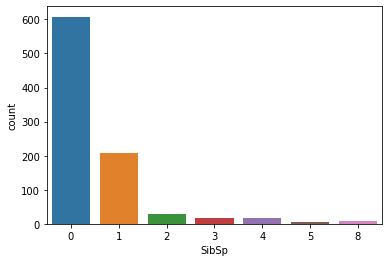

In [124]:
sns.countplot(x=X.SibSp);

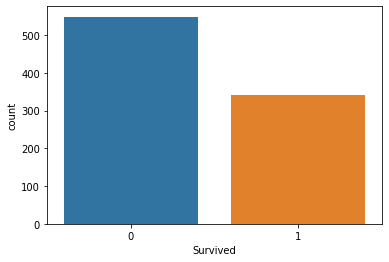

In [126]:
sns.countplot(x=y);

# Conclusion. Final Data Preprocessing pipeline